In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)
scaled_data

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [5]:
# Create a DataFrame with the scaled data
scaled_data_df = pd.DataFrame(scaled_data, index=market_data_df.index, 
                              columns=market_data_df.columns)

# Copy the crypto names from the original data
# Set the coinid column as index
scaled_data_df.index = market_data_df.index

# Display sample data
scaled_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data_df)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


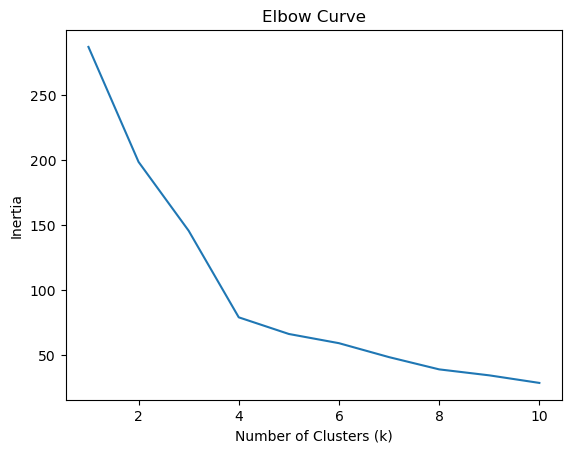

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df["k"], elbow_df["inertia"])
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=24 )

In [9]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=24)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predict_clusters = kmeans.predict(scaled_data_df)

# View the resulting array of cluster values.
predict_clusters

array([3, 3, 0, 0, 3, 3, 3, 3, 1, 1, 0, 0, 0, 3, 1, 1, 0, 1, 3, 0, 0, 3,
       0, 0, 0, 0, 1, 1, 3, 0, 1, 1, 2, 1, 1, 0, 3, 1, 1, 0, 0],
      dtype=int32)

In [11]:
# Create a copy of the DataFrame
cluster_data_df = market_data_df.copy()

In [12]:
# Add a new column to the DataFrame with the predicted clusters
cluster_data_df['Cluster'] = predict_clusters

# Display sample data
cluster_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,3
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,3
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,3


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

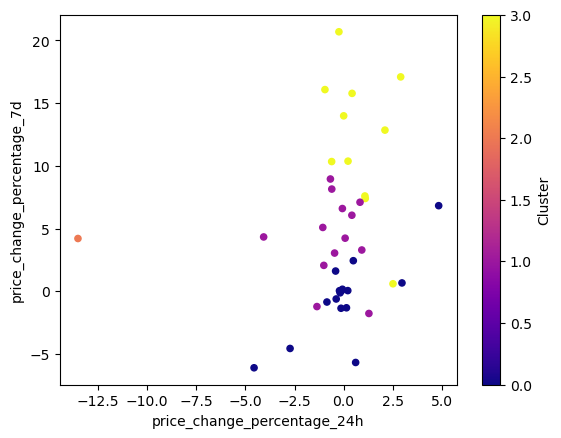

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
cluster_data_df.plot.scatter(x='price_change_percentage_24h', 
                             y='price_change_percentage_7d',
                             c='Cluster',
                             colormap = 'plasma')


### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_data_df)
pca_df = pd.DataFrame(pca_data, index=market_data_df.index, 
columns=["PC1", "PC2", "PC3"])
# View the first five rows of the DataFrame. 
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
#explained_variance
explained_variance.sum()

0.8950316570309844

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.895

In [17]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data
pca_df.index = scaled_data_df.index

# Set the coinid column as index


# Display sample data
pca_df

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [18]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values_pca = range(1, 11)

# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values_pca:
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    kmeans_pca.fit(pca_df)
    inertia_pca.append(kmeans_pca.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values_pca, "inertia": inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
elbow_df_pca

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314
5,6,30.796642
6,7,25.915457
7,8,21.890936
8,9,17.720699
9,10,13.838699


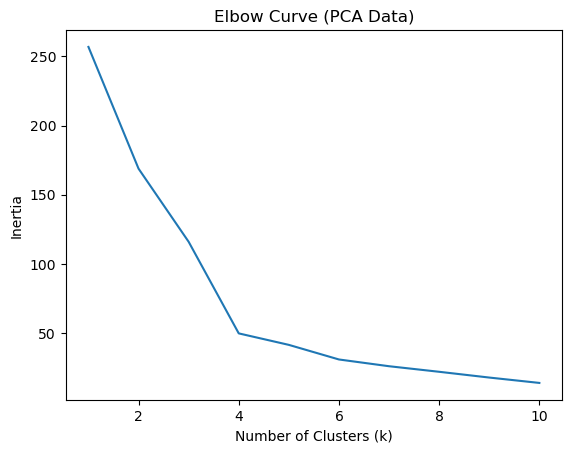

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df_pca["k"], elbow_df_pca["inertia"])
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve (PCA Data)")
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not differ

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [20]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=24)

In [21]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)

KMeans(n_clusters=4, random_state=24)

In [22]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters_pca = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values.
predicted_clusters_pca

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [23]:
# Create a copy of the DataFrame with the PCA data
pca_clustered_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_clustered_df['Cluster'] = predicted_clusters_pca

# Display sample data
pca_clustered_df.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


<Axes: xlabel='PC1', ylabel='PC2'>

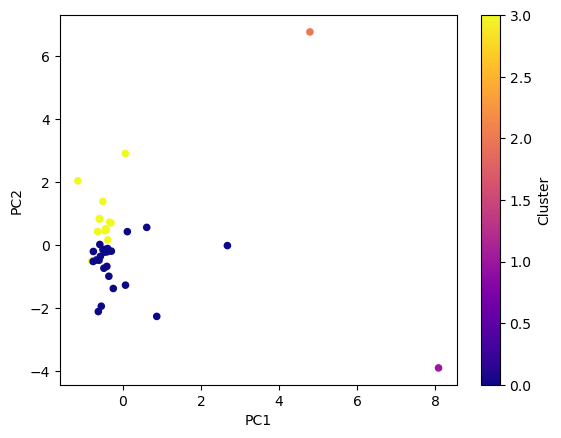

In [24]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_clustered_df.plot.scatter(x='PC1', 
                              y='PC2', 
                              c='Cluster',
                              colormap = 'plasma')

### Determine the Weights of Each Feature on each Principal Component

In [25]:
# Use the columns from the original scaled DataFrame as the index.
weights_df = pd.DataFrame(pca.components_.T, index=scaled_data_df.columns, 
                          columns=["PC1", "PC2", "PC3"])
weights_df

,PC1,PC2,PC3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
PC1
strongest positive influence: price_change_percentage_200d (0.594468)
strongest negative influence: price_change_percentage_24h (-0.416728) 
PC2
strongest positive influence: price_change_percentage_30d (0.562182)
strongest negative influence: price_change_percentage_1y (-0.150789)
PC3
strongest positive influence: price_change_percentage_7d  (0.787670) 
strongest negative influence: price_change_percentage_60d (-0.361377)   